# SKLEARN METRICS AND MODEL SELECTION

In this workbook, we will explore various evaluation metrics and mode selection options available in Sklearn python library

In [108]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patsy as pt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score,recall_score,precision_recall_curve,f1_score
from sklearn.metrics.scorer import SCORERS
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve

In [2]:
%matplotlib inline

In [3]:
columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

In [4]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, names=columns)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

The dataet has both categorial and numerical variables. We will convert the categorical variables to dummy variables using Patsy for Logisticregression and SVM to work

In [7]:
df['education'].value_counts() #majority of records belong to HS-grad

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [8]:
df['occupation'].value_counts() #there are missing values in occupation column

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [9]:
df['occupation'].isnull().any() #This paints misleading pciture as missing values are replaced with '?'

False

The categorical values imported have blank spaces associated with them. We will try to strip them

In [10]:
df['occupation']=df['occupation'].apply(lambda x: x.strip())

In [11]:
df=df[df['occupation']!='?'] #For demonstration purpose we shall remove all those records with '?'

In [12]:
df['occupation'].value_counts() # all missing values removed

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
df['marital_status'].value_counts()

 Married-civ-spouse       14339
 Never-married             9912
 Divorced                  4258
 Separated                  959
 Widowed                    840
 Married-spouse-absent      389
 Married-AF-spouse           21
Name: marital_status, dtype: int64

In [14]:
df=df[df['native_country']!=' ?']

In [15]:
df.shape #dataframe has 30162 rows and 15 columns after removing missing data

(30162, 15)

In [16]:
df['income'].value_counts() #the dataset is dominated by people with income <=50k

 <=50K    22654
 >50K      7508
Name: income, dtype: int64

In [17]:
df['income']=df['income'].map({' <=50K':0,' >50K':1}) #mapping income levls to 0 and 1

In [18]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Convert categorical variables into dummy variables

In [19]:
pd.get_dummies(df['education']).head() #It is laborious to convert every categorical variable into dummy variables. 

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


I will be using patsy to convert all the variables at one go

In [20]:
y,X=pt.dmatrices("income~age+C(workclass)+fnlwgt+C(education)+education_num+C(marital_status)+C(occupation)+C(relationship)+C(race)+C(sex)+capital_gain+capital_loss+hours_per_week+C(native_country)+income",df)

In [21]:
y=np.squeeze(np.array(y))

In [22]:
y.shape

(30162,)

In [23]:
X=np.array(X)

In [24]:
X.shape #All categorical variables are converted into dummy variables

(30162, 98)

# Evaluation of Metrics

I'm not performing EDA or extensive preprocessing so the results may be poor. However, I will go through each metric

In [98]:
print(sorted(list(SCORERS.keys()))) #list of scores availble in sklearn library

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [40]:
logReg=LogisticRegression(C=1)
logReg.fit(X_train,y_train)
print(logReg.score(X_train,y_train))
print(logReg.score(X_test,y_test))

0.793112594492
0.783848295982


In [41]:
y_pred=logReg.predict(X_test)

In [42]:
confusion_matrix(y_pred,y_test) #confusion Matrix divides the records in True Positives, True Negetives, False Positive, False Negetive

array([[5428, 1419],
       [ 211,  483]], dtype=int64)

In [44]:
print(classification_report(y_pred,y_test))#straightaway you can see large number of False positives affecting the precision of 1

             precision    recall  f1-score   support

        0.0       0.96      0.79      0.87      6847
        1.0       0.25      0.70      0.37       694

avg / total       0.90      0.78      0.82      7541



In [74]:
y_score=logReg.decision_function(X_test) #decision function gives the distance between the point and the decision boundary

In [75]:
y_score

array([-0.84926114, -1.54123025, -1.24529173, ..., -0.94528208,
       -1.72265273, -1.00989007])

In [85]:
precision, recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_score)

In [88]:
thresholds  #the decision boundary shifted towards zero class so that all positve examples are predicted correctly

array([ -5.23638957,  -4.63588547,  -4.04353545, ...,  31.95963295,
        32.06402782,  32.17615227])

In [90]:
recall #when decision boundary is shifted to -5 recall becomes 1

array([  1.00000000e+00,   9.99474238e-01,   9.99474238e-01, ...,
         1.05152471e-03,   5.25762355e-04,   0.00000000e+00])

In [86]:
closest_zero = np.argmin(np.abs(thresholds)) #finding the index where threshold is zero
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

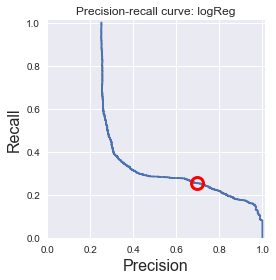

In [87]:
plt.figure()
sns.set()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: logReg")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

In [93]:
fpr,tpr,thresholds=roc_curve(y_score=y_score,y_true=y_test)

In [94]:
fpr

array([  0.00000000e+00,   0.00000000e+00,   1.77336407e-04, ...,
         9.99645327e-01,   9.99645327e-01,   1.00000000e+00])

In [95]:
tpr

array([  5.25762355e-04,   8.14931651e-02,   8.14931651e-02, ...,
         9.99474238e-01,   1.00000000e+00,   1.00000000e+00])

In [96]:
thresholds

array([ 32.17615227,   2.38213397,   2.30048659, ...,  -4.63588547,
        -5.23638957,  -6.04112743])

In [78]:
roc_auc_lr=auc(fpr,tpr)
print(roc_auc_lr)#area under the curve is 0.57 i.e., classifier is marginally performing better than naive classifier

0.571172223487


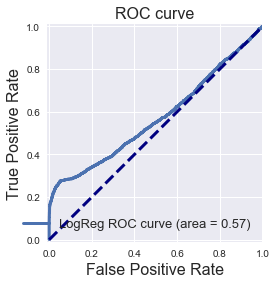

In [83]:
plt.figure()
sns.set()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='LogReg ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

# Model Selection

In [102]:
cross_val_score(logReg,X,y,cv=5, scoring='f1') #f1 scores obtained using 5 fold validation

array([ 0.38424125,  0.38095238,  0.3920039 ,  0.37932716,  0.3976665 ])

In [104]:
cross_val_score(logReg,X,y,cv=5) #accuracy obtained using 5 fold validation

array([ 0.79015415,  0.7866733 ,  0.7933035 ,  0.78895889,  0.79456143])

In [107]:
cross_validate(logReg,X,y,cv=5,scoring=['f1','accuracy']) #return train and test scores for different metrics at one go

{'fit_time': array([ 0.13688016,  0.1364603 ,  0.14063835,  0.15723825,  0.14048791]),
 'score_time': array([ 0.00410223,  0.        ,  0.        ,  0.        ,  0.01562595]),
 'test_accuracy': array([ 0.79015415,  0.7866733 ,  0.7933035 ,  0.78895889,  0.79456143]),
 'test_f1': array([ 0.38424125,  0.38095238,  0.3920039 ,  0.37932716,  0.3976665 ]),
 'train_accuracy': array([ 0.78963073,  0.79162004,  0.79079116,  0.79113137,  0.7908085 ]),
 'train_f1': array([ 0.38517442,  0.38876732,  0.38708111,  0.3924783 ,  0.38378906])}

In [110]:
validation_curve(logReg,X,y,cv=5,param_name='C',param_range=[0.5,2]) #returns training and test score for different parameter values

(array([[ 0.78963073,  0.79162004,  0.79079116,  0.79067551,  0.7908085 ],
        [ 0.79095694,  0.79162004,  0.79079116,  0.79113137,  0.7908085 ]]),
 array([[ 0.79015415,  0.7866733 ,  0.7933035 ,  0.78763263,  0.79456143],
        [ 0.7899884 ,  0.7866733 ,  0.7933035 ,  0.78895889,  0.79456143]]))

In [113]:
learning_curve(logReg,X,y,train_sizes=[20000,15000,13000],cv=3) #return training and test scores for different sample sizes

(array([13000, 15000, 20000]), array([[ 0.79169231,  0.79207692,  0.79261538],
        [ 0.7904    ,  0.7918    ,  0.79093333],
        [ 0.7913    ,  0.79095   ,  0.7921    ]]), array([[ 0.78975634,  0.79112791,  0.79448921],
        [ 0.788364  ,  0.79033221,  0.79419079],
        [ 0.788364  ,  0.79082952,  0.7937929 ]]))

In [123]:
gridSearch=GridSearchCV(logReg,param_grid={'C':[0.5,1],'class_weight':['balanced']},cv=3) #Gridsearch is an extensive testing 

In [124]:
gridSearch.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.5, 1], 'class_weight': ['balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [126]:
gridSearch.best_params_  #C=0.5 and class_weight='Balanced gave best results'

{'C': 0.5, 'class_weight': 'balanced'}

In [128]:
gridSearch.best_score_ #whoa! we got a test score of 0.999

0.9999336913997745

In [129]:
gridSearch.cv_results_

{'mean_fit_time': array([ 0.37253952,  0.43655078]),
 'mean_score_time': array([ 0.00200605,  0.00233889]),
 'mean_test_score': array([ 0.99993369,  0.99993369]),
 'mean_train_score': array([ 0.99993369,  0.99995027]),
 'param_C': masked_array(data = [0.5 1],
              mask = [False False],
        fill_value = ?),
 'param_class_weight': masked_array(data = ['balanced' 'balanced'],
              mask = [False False],
        fill_value = ?),
 'params': [{'C': 0.5, 'class_weight': 'balanced'},
  {'C': 1, 'class_weight': 'balanced'}],
 'rank_test_score': array([1, 1]),
 'split0_test_score': array([ 0.99990055,  0.99990055]),
 'split0_train_score': array([ 0.99995027,  1.        ]),
 'split1_test_score': array([ 0.99990054,  0.99990054]),
 'split1_train_score': array([ 0.99995027,  0.99995027]),
 'split2_test_score': array([ 1.,  1.]),
 'split2_train_score': array([ 0.99990054,  0.99990054]),
 'std_fit_time': array([ 0.02862006,  0.00816194]),
 'std_score_time': array([ 0.00141849,  0

In [131]:
gridSearch.grid_scores_ #setting weight as balanced gave spot on results

C:\Users\ajit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.99993, std: 0.00005, params: {'C': 0.5, 'class_weight': 'balanced'},
 mean: 0.99993, std: 0.00005, params: {'C': 1, 'class_weight': 'balanced'}]